# Graphes Partie I : définitions, exemples et construction

# Description "simple" de graphes

## Un premier exemple historique

Les graphes sont des objets permettant de représenter et caractériser des données liées entre elles, telles que peuvent l'être des données issues de réseaux. Les graphes sont avant tout des objets de la théorie mathématique des graphes, initialement développée par Euler en 1735. A cette date, il a effectivement résolu le problème des 7 ponts de Königsberg (aujourd'hui Kaliningrad).

Voici un énoncé du problème : *La ville de Königsberg est construite autour de deux îles situées sur le Pregel et reliées entre elles par un pont. Six autres ponts relient les rives de la rivière à l'une ou l'autre des deux îles, comme représentés sur le plan ci-dessus. Le problème consiste à déterminer s'il existe ou non une promenade dans les rues de Königsberg permettant, à partir d'un point de départ au choix, de passer une et une seule fois par chaque pont, et de revenir à son point de départ, étant entendu qu'on ne peut traverser le Pregel qu'en passant sur les ponts.* La réponse est qu'une telle promenade n'existe pas...

![](im/ponts.png)   

La solution à ce problème est bien plus facile à intuiter en construisant le graphe ci-dessus, dans lequel les *disques*, nommés **sommets**, représentent les terres; et les *traits*, nommés **arêtes**, représentent les ponts. L'abscence de solution au problème est lié au fait que chaque sommet possède un nombre impair d'arêtes.

On peut lire l'article original d'Euler à l'adresse suivante : http://eulerarchive.maa.org/docs/originals/E053.pdf

## Création d'un premier graphe : introduction du vocabulaire et des notations

Un **graphe** est un ensemble de **sommets** (ou **noeuds**) et d'**arêtes**, les arrêtes reliant deux sommets. Deux sommets reliés par une arêtes sont **adjacents**. L'**ordre** d'un graphe est son nombre de sommets.

Créons et visualisons un tel graphe : pour cela, nous allons utiliser le module `networkx`, et les commandes associées :

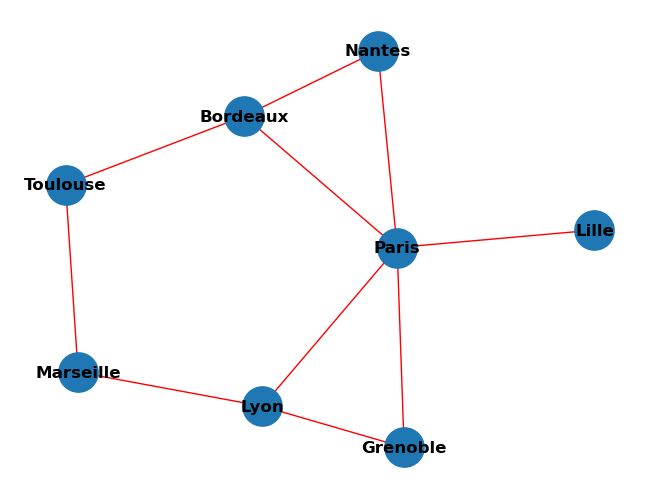

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

# Création du graphe
graphe_train = nx.Graph()

# Ajout de noeuds :
graphe_train.add_node("Lille")
graphe_train.add_node("Paris")
graphe_train.add_node("Marseille")
graphe_train.add_node("Lyon")
graphe_train.add_node("Bordeaux")
graphe_train.add_node("Grenoble")
graphe_train.add_node("Nantes")
graphe_train.add_node("Toulouse")

# Ajout d'arêtes :
graphe_train.add_edge("Lille","Paris")
graphe_train.add_edge("Nantes","Paris")
graphe_train.add_edge("Bordeaux","Paris")
graphe_train.add_edge("Lyon","Paris")
graphe_train.add_edge("Bordeaux","Nantes")
graphe_train.add_edge("Bordeaux","Toulouse")
graphe_train.add_edge("Marseille","Toulouse")
graphe_train.add_edge("Marseille","Lyon")
graphe_train.add_edge("Grenoble","Lyon")
graphe_train.add_edge("Grenoble","Paris")

# Représentation graphique à l'aide de Matplotlib :
nx.draw(graphe_train, node_size=800, edge_color='red', with_labels=True,font_weight='bold')
plt.show()

Il s'agit du graphe les liaisons ferroviaires directes entre grandes villes française. Si on souhaite une représentation plus esthétique et dynamique, qu'on peut par exemple réorganiser spatialement pour se rapprocher du placement géographique des villes :

In [2]:
net = Network()
net.from_nx(graphe_train)
display(net.show("graphe_train.html"))

None

On note mathématiquement un tel graphe G = (S,A), avec S les sommets et A les arêtes.

## Quelques exemples réels

**Réseaux sociaux** : Chaque sommet est une personne, et les arêtes les liens entre personnes.

![](im/sn_simple.png)

Un exemple fictionnel, avec le réseau des intéractions sociales entre les personnages de *Game of Throne* :

![](im/sn_got.png)

Enfin un dernier exemple : il s'agit des intéractions entre l'ensemble des chercheurs ayant publié des articles sur l'hépatite C, entre 2008 et 2012.

![](im/sn_bio.jpg)

**Réseaux de transport :** Comme dans l'exemple de la partie précédente, chaque sommet est un arrêt de train / métro / tramway, etc. Les arrêtes sont les liaisons.

**Réseaux technologiques :** On peut faire des graphes des réseaux électrique, de communication (téléphone, fibre optique, ...) et bien evidemment du réseau internet (web). Voici par exemple un vue du réseau World Wide Web :

![](im/Internet.png)

**Réseaux écologiques :** On peut réprésenter les liens existants entre les différents espèces vivantes sur Terre par des graphes :

![](im/ecn1.png)

En version bien plus complexe :

![](im/ecn2.jpeg)

**Réseaux biologiques :** Il existe de nombreux graphes dans les domaines biologiques. En voici certains d'entre eux, en commençant par un graphe des variants du covid : chaque sommet est un variant, et chaque arête un lien de "descendence".

![](im/bn_covid.png)

Il existe aussi de nombreux graphes d'intéractions entre protéines, comme ci-dessous. Dans ce graphe, chaque sommet est une protéine intervenant dans le schizophrénie, et chaque arête une intéraction entre ces différentes protéines.

![](im/bn_prot.jpg)

# Autres caractéristiques et propriétés 

## Pondération

On peut attribuer un "*poids*" à chaque arrête, qui dépend de l'usage du graphe. Par exemple, pour des graphes de transport, on peut mettre comme poids le temps de parcours de chaque arrête. Voici le premier graphe modifié pour tenir compte des temps de trajets :

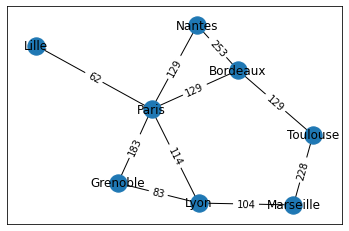

In [4]:
# Création du graphe
graphe_train_pond = nx.Graph()

# Ajout de noeuds :
graphe_train_pond.add_node("Lille")
graphe_train_pond.add_node("Paris")
graphe_train_pond.add_node("Marseille")
graphe_train_pond.add_node("Lyon")
graphe_train_pond.add_node("Bordeaux")
graphe_train_pond.add_node("Grenoble")
graphe_train_pond.add_node("Nantes")
graphe_train_pond.add_node("Toulouse")

# Ajout d'arêtes (pondération : durée du trajet en minutes dasn l'argument 'weight') :
graphe_train_pond.add_edge("Lille","Paris", value = 1/62, weight = 62)
graphe_train_pond.add_edge("Nantes","Paris", value = 1/129, weight = 129)
graphe_train_pond.add_edge("Bordeaux","Paris", value = 1/129, weight = 129)
graphe_train_pond.add_edge("Lyon","Paris", value = 1/114, weight = 114)
graphe_train_pond.add_edge("Bordeaux","Nantes", value = 1/253, weight = 253)
graphe_train_pond.add_edge("Bordeaux","Toulouse", value = 1/129, weight = 129)
graphe_train_pond.add_edge("Marseille","Toulouse", value = 1/228, weight = 228)
graphe_train_pond.add_edge("Marseille","Lyon", value = 1/104, weight = 104)
graphe_train_pond.add_edge("Grenoble","Lyon", value = 1/83, weight = 83)
graphe_train_pond.add_edge("Grenoble","Paris", value = 1/183, weight = 183)

# Représentation graphique à l'aide de Matplotlib, en affichant les pondérations sur chaque arête :
pos=nx.spring_layout(graphe_train_pond) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(graphe_train_pond,pos)
labels = nx.get_edge_attributes(graphe_train_pond,'weight')
nx.draw_networkx_edge_labels(graphe_train_pond,pos,edge_labels=labels)
plt.show()

De même pour la représentation intéractive, dans laquelle l'épaisseur des arêtes est inversement proportionnelle à la durée du trajet (grâce à l'arguemnt `value`) :

In [5]:
net = Network(notebook = True)
net.from_nx(graphe_train_pond)
net.show("graphe_train_pond.html")

Pour un moteur de recherche, sur le graphe du web, on peut mettre comme poids pour les liens (arêtes) entre chaque site le nombre de références et la popularité (voir https://fr.wikipedia.org/wiki/PageRank, algorithme qui a fait le succès de Google). Dans le cas de réseaux sociaux, la pondération est généralement reliée aux liens d'affinité, et toute la difficulté repose à estimer ce *poids* (nombre de messages échangés, ...).

## Connexité, cycle et boucle

Le **degré** d'un sommet $s$, noté $d(s)$, est le nombre d'arêtes dont ce sommet est une extrémité. Un graphe **connexe** est un graphe dans lequel chaque sommet peut être relié à tout autre sommet par une arête ou une suite d'arêtes : on peut dire qu'un graphe connexe est *d'un seul tenant*.

**Question 1 :** Pour le graphe des liaisons ferroviaires, quel est l'ordre du graphe ? Est-il connexe ? Quel est le sommet de plus grand degré ? Ajouter alors un sommet pour le rendre non connexe.

Le graphe des laisons ferroviaires est connexe, et d'ordre 8. Paris est le sommet de plus grand degré ($d("Paris") = 5)$. Ajoutons un sommet non relié aux autres :

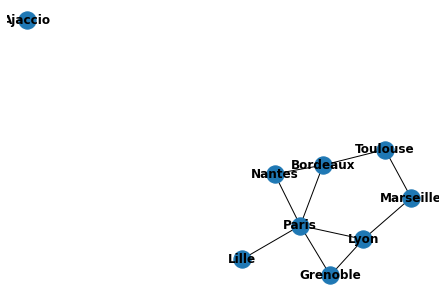

In [6]:
graphe_train.add_node("Ajaccio")

# Représentation graphique à l'aide de Matplotlib :
nx.draw(graphe_train, with_labels=True,font_weight='bold')
plt.show()

In [7]:
net = Network()
net.from_nx(graphe_train)
net.show("graphe_train.html")

In [8]:
graphe_train.remove_node("Ajaccio")

Un **cycle** est une suite d'arêtes consécutives dont les deux sommets extrémités sont identiques. Une **boucle** est une arête ayant pour extremités le même sommet : il s'agit d'un cycle constitué d'une seule arête.

**Question 2 :** Dans le graphe des liaisons ferroviaires, donner les sommets constituant le plus grand cycle. Existe-t-il une boucle dans ce graphe ? Citer un type de graphe susceptible de comporter une boucle.

Plus grand cycle : Paris - Grenoble - Lyon - Marseille - Toulouse - Bordeaux - Nantes - Paris. Pas de boucle dans le graphe des liaisons ferroviaires, ce serait assez inutile en terme de transport... On peut trouver des boucles sur des graphes du web (lien d'un site vers lui-même, généralement une autre page), ou prédation si cannibalisme.

## Orientation et degrés

Un graphe est **orienté** si des arêtes sont orientées : ces arêtes sont alors nommées **arcs**, et représentés par une flèche.

**Question 3 :** Citer des exemples de graphes orientés.  Représenter un tel graphe (très simple).

Graphe du web : les liens entre sites sont directionnels (d'un site vers un autre). Graphes écologiques de prédation (dans la plupart des cas : le requin mange (très peu) d'humains,  et les humains mangent malheureusement des requins !). Graphe des variants du Covid, avec les liens de *descendance*. Arbres généalogiques + graphes routiers avec rue à sens unique.

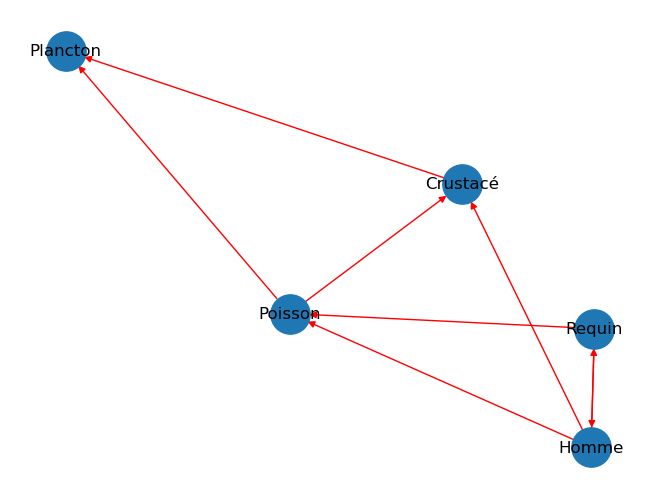

In [5]:
# Création du graphe
graphe_pred = nx.DiGraph()

# Ajout de noeuds :
graphe_pred.add_node("Homme")
graphe_pred.add_node("Requin")
graphe_pred.add_node("Poisson")
graphe_pred.add_node("Plancton")
graphe_pred.add_node("Crustacé")

# Ajout d'arêtes :
graphe_pred.add_edge("Homme","Requin")
graphe_pred.add_edge("Requin","Homme")
graphe_pred.add_edge("Requin","Poisson")
graphe_pred.add_edge("Homme","Poisson")
graphe_pred.add_edge("Homme","Crustacé")
graphe_pred.add_edge("Poisson","Crustacé")
graphe_pred.add_edge("Poisson","Plancton")
graphe_pred.add_edge("Crustacé","Plancton")

# Représentation graphique à l'aide de Matplotlib :
nx.draw(graphe_pred, node_size=800, edge_color='red', with_labels=True)
plt.show()

In [6]:
net = Network(directed = True, notebook = True)
net.from_nx(graphe_pred)
net.show("graphe_pred.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


On peut définir, pour un graphe orienté, les **degré sortant** $d_+ (s)$ et **degré entrant**  $d_- (s)$, qui sont respectivement le nombre d'arcs partant ou arrivant sur ce sommet $s$. On a alors $d(s) = d_-(s) + d_+(s)$.

**Question 4 :** Pour le sommet *Homme* du graphe de prédation, quels sont les degrés ?

$d_-(Homme) = 1$, $d_+(Homme) = 2$ et $d(Homme) = 3$

# Construire et utiliser des graphes

## Implémentation : liste et dictionnaire d'adjacence

D'un point vue *structure de données*, il existe différents moyens d'implémenter un graphe. Pour simplifier, nous étudierons ici seulement des graphes non orientés. Considérons le graphe suivant :

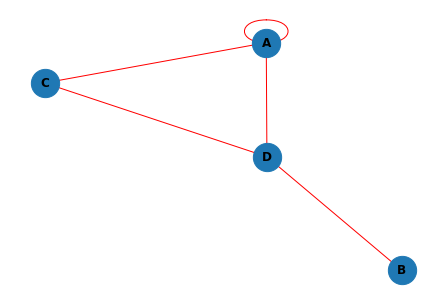

In [3]:
# Création du graphe
graphe = nx.Graph()

# Ajout de noeuds :
graphe.add_node("A")
graphe.add_node("B")
graphe.add_node("C")
graphe.add_node("D")

# Ajout d'arêtes :
graphe.add_edge("A","A")
graphe.add_edge("A","C")
graphe.add_edge("A","D")
graphe.add_edge("B","D")
graphe.add_edge("C","D")

# Représentation graphique à l'aide de Matplotlib :
nx.draw(graphe, node_size=800, edge_color='red', with_labels=True,font_weight='bold')
plt.show()

On définit alors le **dictionnaire d'adjacence** ainsi : il s'agit du dictionnaire contenant les *sommets* comme *clefs*, et à chacune de ces clefs, on associe comme *valeur* la liste des *autres sommets liés par une arête*, c'est-à-dire les *sommets adjacents*. . Ainsi on peut écrire, pour le graphe précédent :

In [39]:
# Ecriture sommet par sommet :
Dict_Graphe = dict()
Dict_Graphe['A'] = ['A', 'C', 'D']
Dict_Graphe['B'] = ['D']
Dict_Graphe['C'] = ['A', 'D']
Dict_Graphe['D'] = ['A', 'B', 'C']

# Ou bien écriture en une seule ligne :
Dict_Graphe = {'A': ['A', 'C', 'D'], # sommets adjacents de A
          'B': ['D'], # sommets adjacents de B
          'C': ['A', 'D'], # sommets adjacents de C
          'D': ['A', 'B', 'C']} # sommets adjacents de D

print(Dict_Graphe)

{'A': ['A', 'C', 'D'], 'B': ['D'], 'C': ['A', 'D'], 'D': ['A', 'B', 'C']}


*Remarques : on pourrait construire une liste de listes plutôt qu'un dictionnaire, en donnant un numéro à chaque sommet. Ici, numérotant les sommets dans l'ordre alphabétique, en commençant par 0 :*

In [40]:
List_Graphe = [[0, 2, 3], # A = 0, C = 1 et D = 3 sont sommets adjacents de A = 0
               [3], # D = 3 est sommet adjacent de B = 1
               [0, 3], # A = 0 et D = 3 sommets adjacents de C = 2
               [0, 1, 2]] # A = 0, B = 1 et C = 2 sont sommets adjacents de D = 3

**Question 5 :** Ecrire le dictionnaire `Dict_train` correspondant au graphe du réseau des liaisons ferrovaires (pour gagner du temps, on pourra éliminer quelques villes ou n'écrire que les 2 premières lettres des villes).

In [15]:
Dict_train = {'Lille': ['Paris'],
              'Paris': ['Lille', 'Nantes', 'Bordeaux', 'Lyon', 'Grenoble'],
              'Nantes': ['Paris', 'Bordeaux'],
              'Bordeaux' : ['Paris', 'Nantes', 'Toulouse'],
              'Toulouse' : ['Bordeaux', 'Marseille'],
              'Marseille' : ['Toulouse', 'Lyon'],
              'Grenoble' : ['Paris', 'Lyon'],
              'Lyon' : ['Paris', 'Marseille', 'Grenoble']}

Ce qu'on peut obtenir directement, avec `networkx` :

In [42]:
nx.to_dict_of_lists(graphe_train)

{'Lille': ['Paris'],
 'Paris': ['Lille', 'Nantes', 'Bordeaux', 'Lyon', 'Grenoble'],
 'Marseille': ['Toulouse', 'Lyon'],
 'Lyon': ['Paris', 'Marseille', 'Grenoble'],
 'Bordeaux': ['Paris', 'Nantes', 'Toulouse'],
 'Grenoble': ['Lyon', 'Paris'],
 'Nantes': ['Paris', 'Bordeaux'],
 'Toulouse': ['Bordeaux', 'Marseille']}

In [2]:
Dict_train["Paris"]

['Lille', 'Nantes', 'Bordeaux', 'Lyon', 'Grenoble']

**Question 6 :** Ecrire au moins 2, au choix, des fonctions suivantes :

- une fonction donnant le nombre de sommets `ordre(dict_graphe)` qui retourne le nombre de sommets contenu dans `dict_graphe`;

- une fonction `test_edge(sommet1, sommet2, dict_graphe)` qui retourne `True` s'il existe, dans le graphe implémenté par le dictionnaire `dict_graphe`, une arrête entre les sommets `sommet1` et `sommet2`;

- une fonction `ajout_sommet(sommet, list_sommets_adj, dict_graphe)` qui ajoute le sommet `sommet` au graphe implémenté par le dictionnaire `dict_graphe`, avec les arêtes entre ce sommets et ses sommets adjacents se trouvant dans la liste `list_sommets_adj`;

- une fonction `nb_aretes(dict_graphe)` qui retourne le nombres d'arêtes du graphe dont `dict_graphe` est l'implantation sous forme d'un dictionnaire (on pourra dans un premier temps considéré qu'il n'y a pas de boucles).

- une fonction `max_1_correspondance(sommet1,sommet2,dict_graphe)` qui retourne `True` si on peut relier les sommets somet1 et sommet2 à l'aide de deux arêtes ou moins.

Vérifier alors le fonctionnement de ces fonctions sur votre dictionnaire `Dict_train`.

In [17]:
def ordre(dict_graphe):
    """Retourne le nombre de sommet d'un graphe, à partir de l'écriture d'un graphe sous forme d'un dictionnaire d'adjacence :
    dict_graphe = {"sommet" : liste des sommets adjacents} """
    return len(dict_graphe)

def test_edge(sommet1, sommet2, dict_graphe):
    """Retourne la variable booléenne True s'il existe une arête entre le sommet 1 et le sommet 2, à partir de l'écriture d'un graphe sous forme d'un dictionnaire d'adjacence :
    dict_graphe = {"sommet" : liste des sommets adjacents} """
    
    # 1ere version "basique" :
    # for sommet in dict_graphe[sommet1] :
    #     if sommet == sommet2 :
    #         return True
    # return False
    
    if sommet1 in dict_graphe :
        if sommet2 in dict_graphe[sommet1]:
            return True
    return False
    
    # dernière version :
    # if sommet1 in dict_graphe :
    #     return sommet2 in dict_graphe[sommet1]
    # else :
    #     return False
    
def ajout_sommet(sommet, list_sommets_adj, dict_graphe):
    """Ajoute le sommet sommet ainsi que les arêtes list_sommets_adj au graphe dict_graphe, implémenté sous forme d'un dictionnaire d'adjacence :
    dict_graphe = {"sommet" : liste des sommets adjacents} """
    
    # Ajout du nouveau sommet et de ses sommets adjacents :
    dict_graphe[sommet] = list_sommets_adj
    
    # A ne pas oublier : il faut ajouter ce nouveau sommet comme sommets adjacents dans les autres sommets :
    for sommet_autre in list_sommets_adj :
        dict_graphe[sommet_autre].append(sommet)

def nb_aretes(dict_graphe):
    """Retourne l'ordre d'un graphe non orienté, à partir de l'écriture d'un graphe sous forme d'un dictionnaire d'adjacence :
    dict_graphe = {"sommet" : liste des sommets adjacents} """
    somme = 0 # on va sommer le nombre de relation d'adjcence
    for sommet in dict_graphe : # pour chaque sommet
        somme += len(dict_graphe[sommet]) # on ajoute le nombre de sommets adjacents
    return somme / 2 # on a compté chaque arête 2 fois !

def max_1_correspondance(sommet1,sommet2,dict_graphe):
    """Retourne la variable booléenne True s'il existe une ou deux arêtes consécutives reliant le sommet sommet1 au sommet sommet2, à partir de l'écriture d'un graphe sous forme d'un dictionnaire d'adjacence :
    dict_graphe = {"sommet" : liste des sommets adjacents} """
    
    if sommet1 in dict_graphe :
        if sommet2 in dict_graphe[sommet1]: #si sommet2 est directement adjacent de sommet1
            return True
        else:
            for sommet_int in dict_graphe[sommet1] : # On cherche avec 1 correspondance, la correspondance étant effectué au sommet_int
                if sommet2 in dict_graphe[sommet_int] : # ESi sommet2 est voisin du sommet_int, c'est bon !
                    return True
    return False

In [18]:
print("Nombre de sommets du graphe des liaisons ferroviaires : ", ordre(Dict_train))
print("Existe-t-il une liasons ferroviaire directe entre Bordeaux et Lyon ? ", test_edge("Bordeaux", "Lyon", Dict_train))
print("Nombre d'arrêtes du graphe des liaisons ferroviaires : ", nb_aretes(Dict_train))
print("Ajout d'un nouveau sommet : Montpellier")
ajout_sommet("Montpellier", ["Bordeaux", "Toulouse"], Dict_train)
print(Dict_train)

# Retablissons le graphe originel : on enlève le sommet qu'on vient de rajouter, pour la suite :
Dict_train.pop("Montpellier")
for sommet in Dict_train :
    if "Montpellier" in Dict_train[sommet]:
        Dict_train[sommet].remove("Montpellier")
print(Dict_train)

print("Peut-on relier Bordeaux à Lyon avec max une correspondance ? ", max_1_correspondance("Bordeaux", "Lyon", Dict_train))

Nombre de sommets du graphe des liaisons ferroviaires :  8
Existe-t-il une liasons ferroviaire directe entre Bordeaux et Lyon ?  False
Nombre d'arrêtes du graphe des liaisons ferroviaires :  10.0
Ajout d'un nouveau sommet : Montpellier
{'Lille': ['Paris'], 'Paris': ['Lille', 'Nantes', 'Bordeaux', 'Lyon', 'Grenoble'], 'Nantes': ['Paris', 'Bordeaux'], 'Bordeaux': ['Paris', 'Nantes', 'Toulouse', 'Montpellier'], 'Toulouse': ['Bordeaux', 'Marseille', 'Montpellier'], 'Marseille': ['Toulouse', 'Lyon'], 'Grenoble': ['Paris', 'Lyon'], 'Lyon': ['Paris', 'Marseille', 'Grenoble'], 'Montpellier': ['Bordeaux', 'Toulouse']}
{'Lille': ['Paris'], 'Paris': ['Lille', 'Nantes', 'Bordeaux', 'Lyon', 'Grenoble'], 'Nantes': ['Paris', 'Bordeaux'], 'Bordeaux': ['Paris', 'Nantes', 'Toulouse'], 'Toulouse': ['Bordeaux', 'Marseille'], 'Marseille': ['Toulouse', 'Lyon'], 'Grenoble': ['Paris', 'Lyon'], 'Lyon': ['Paris', 'Marseille', 'Grenoble']}
Peut-on relier Bordeaux à Lyon avec max une correspondance ?  True


**Question 7 :** Ecrire la fonction `dict_to_graph(dict_graphe)` qui, à partir du dictionnaire d'adjacence, construit le graphe via les fonctions `add_node` et `add_edge` de `networkx`.

In [19]:
def dict_to_graph(dict_graphe):
    """Construit et affiche une graphe non orienté et non pondéré en networkx à partir du dictionnaire d'adjacence du format :
    dict_graphe = {'Sommet': liste des sommets adjacents}"""
    
    # Création du graphe
    graphe = nx.Graph()
    
    # Ajout des noeuds :
    for sommet in dict_graphe :
        graphe.add_node(sommet)

    # Ajout des arêtes :
    for sommet in dict_graphe : 
        for sommet_adj in dict_graphe[sommet] :
            graphe.add_edge(sommet, sommet_adj)
    
    nx.draw(graphe, node_size=800, edge_color='red', with_labels=True,font_weight='bold')
    plt.show()

Testons avec le graphe des laisons ferroviaires :

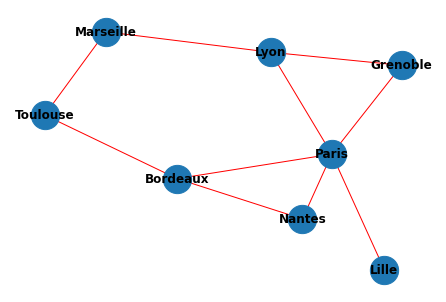

In [20]:
dict_to_graph(Dict_train)

Dans le cas de **graphes pondérés**, il est évidemment intéressant d'ajouter le poids comme information. Deux possibilités : on utilise à nouveau une liste ou un dictionnaire, en remplaçant chaque  sommet adjacent par une liste conenant le sommet et le poids de l'arête.  Exemple :

In [ ]:
Graphe_train = {'Lille': [['Paris',62]],
                'Paris': [['Lille',62], ['Nantes',129], ...}

Cette écriture est assez lourde : cela correspond à des listes (ou dictionnaires) de listes de listes ! Dans ces cas, on utilise plutôt des **matrices d'adjacences**.

## Implémentation : matrice d'adjacence


Commençons par le cas simple de la matrice d'adjacence pour un graphe non pondéré : à la ligne $i$ et à la colonne $j$, elle contient $0$ s'il n'y a pas d'arête entre les sommets numérotés $i$ et $j$, et $1$ sinon.

**Question 8 :** Ecrire la matrice d'adjacence `M_train` (en numpy ou grâce à une liste de liste) pour l'exemple du réseau des liaisons ferroviaires. On numérotera les villes dans l'ordre alphabétique.

In [79]:
sorted(["Lille", "Paris", "Marseille", "Lyon", "Bordeaux", "Grenoble", "Nantes", "Toulouse"])

['Bordeaux',
 'Grenoble',
 'Lille',
 'Lyon',
 'Marseille',
 'Nantes',
 'Paris',
 'Toulouse']

In [79]:
M_train = [[0, 0, 0, 0, 0, 1, 1, 1], # sommets adjacents de Bordeaux
           [0, 0, 0, 1, 0, 0, 1, 0], # sommets adjacents de Grenoble
           [0, 0, 0, 0, 0, 0, 1, 0], # sommets adjacents de Lille
           [0, 1, 0, 0, 1, 0, 1, 0], # sommets adjacents de Lyon
           [0, 0, 0, 1, 0, 0, 0, 1], # sommets adjacents de Marseille
           [1, 0, 0, 0, 0, 0, 1, 0], # sommets adjacents de Nantes
           [1, 1, 1, 1, 0, 1, 0, 0], # sommets adjacents de Paris
           [1, 0, 0, 0 ,1, 0, 0 ,0]] # sommets adjacents de Toulouse

display(M_train)

[[0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 1, 0],
 [1, 1, 1, 1, 0, 1, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0]]

Avec numpy :

In [4]:
import numpy as np

M_train_n = np.zeros((8,8))

def modif_1_sym(i,j,M):
    M_train_n[i,j], M_train_n[j,i] = 1, 1

modif_1_sym(0,5,M_train_n)
modif_1_sym(0,6,M_train_n)
modif_1_sym(0,7,M_train_n)
modif_1_sym(1,3,M_train_n)
modif_1_sym(1,6,M_train_n)
modif_1_sym(2,6,M_train_n)
modif_1_sym(3,4,M_train_n)
modif_1_sym(3,6,M_train_n)
modif_1_sym(4,7,M_train_n)
modif_1_sym(5,6,M_train_n)
print(M_train_n)

[[0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0.]
 [1. 1. 1. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0.]]


La matrice d'adjacence d'un graphe non pondéré et non orienté est forçement symétrique ! On peut bien evidememnt obtenir une matrice d'adjacence avec `networkx` (ici l'ordre n'est pas l'ordre alphabétique, ce qui explique la différence avec celle que nous avons construit ) :

In [97]:
import numpy as np
nx.to_numpy_matrix(graphe_train)

matrix([[0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 1., 1., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1.],
        [0., 1., 1., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 1., 1.],
        [0., 1., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.]])

**Question 9 :** Ecrire une fonction `mat_to_dict(M)` qui, à partir d'une matrice d'ajacence M, construit le dictionnaire d'adjacence.

In [81]:
import string

def mat_to_dict_lettres(M) :
    """Construit un dictionnaire d'adjacence du format dict_graphe = {'Sommet': liste des sommets adjacents}
    à partir d'une matrice d'adjacence en format liste de liste.
    Choix : les sommets sont nommés par les lettres de l'alphabet, en espérant qu'il y ait assez !
    """    
    # nb de sommets
    n = len(M)
    assert n < 27
    
    # liste des lettres de l'alphabet en majuscules
    Alphabet = list(string.ascii_uppercase) 
    
    # Création du dictionnaire
    dict_graphe = {}
    
    # Ajout des sommets avec les arêtes :
    for i in range(n) : # pour chaque sommet
        dict_graphe[Alphabet[i]] = []
        for j in range(n) : # pour chaque sommet adjacent possible
            if M[i][j] == 1 : # si le sommet j est bien adjacent avec le sommet i :
                dict_graphe[Alphabet[i]].append(Alphabet[j])

    return dict_graphe

def mat_to_dict_nb(M) :
    """Construit un dictionnaire d'adjacence du format dict_graphe = {'Sommet': liste des sommets adjacents}
    à partir d'une matrice d'adjacence en format liste de liste.
    Choix : les sommets sont nommés par des entiers, commençant à 0
    """    
    # nb de sommets
    n = len(M)
    
    # Création du dictionnaire
    dict_graphe = {}
    
    # Ajout des sommets avec les arêtes :
    for i in range(n) : # pour chaque sommet (1 ligne de la matrice)
        dict_graphe[i] = []
        for j in range(n) : # pour chaque sommet adjacent possible (1 colonne)
            if M[i][j] == 1 : # si le sommet j est bien adjacent avec le sommet i :
                dict_graphe[i].append(j)

    return dict_graphe

In [82]:
mat_to_dict_lettres(M_train)

{'A': ['F', 'G', 'H'],
 'B': ['D', 'G'],
 'C': ['G'],
 'D': ['B', 'E', 'G'],
 'E': ['D', 'H'],
 'F': ['A', 'G'],
 'G': ['A', 'B', 'C', 'D', 'F'],
 'H': ['A', 'E']}

Plus simplement, avec des nombres entiers, on peut alors facilement remonté au dictionnaire avec le nom des villes :

In [89]:
Dict = mat_to_dict_nb(M_train)
print(Dict)

Noms = sorted(["Lille", "Paris", "Marseille", "Lyon", "Bordeaux", "Grenoble", "Nantes", "Toulouse"])

# Nouveau dict (temporaire) :

Dict_noms = dict()

for sommet in Dict:
    Dict_noms[Noms[sommet]] = []
    for sommet_adj in Dict[sommet]:
        Dict_noms[Noms[sommet]].append(Noms[sommet_adj])

Dict = Dict_noms  
print(Dict)

{0: [5, 6, 7], 1: [3, 6], 2: [6], 3: [1, 4, 6], 4: [3, 7], 5: [0, 6], 6: [0, 1, 2, 3, 5], 7: [0, 4]}
{'Bordeaux': ['Nantes', 'Paris', 'Toulouse'], 'Grenoble': ['Lyon', 'Paris'], 'Lille': ['Paris'], 'Lyon': ['Grenoble', 'Marseille', 'Paris'], 'Marseille': ['Lyon', 'Toulouse'], 'Nantes': ['Bordeaux', 'Paris'], 'Paris': ['Bordeaux', 'Grenoble', 'Lille', 'Lyon', 'Nantes'], 'Toulouse': ['Bordeaux', 'Marseille']}


**Question 10 :** Utiliser les deux fonctions définies précedemment pour réaliser le graphe des liaisons ferroviaires à partir de la matrice d'adjacence `M_train`.

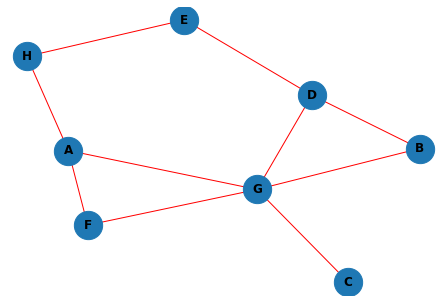

In [90]:
dict_to_graph(mat_to_dict(M_train))

On retrouve bien la *forme* de notre graphe des liaisons ferroviaires, même si les sommets ne sont pas nommés par les noms des villes.

Pour un graphe pondéré, on remplace les *1* de la matrice d'adjacence par le *poids* de chaque arrête. Mais par quoi remplace-t-on les 0, qui renseigne sur l'abscence d'arrête ? Cela dépend des graphes... On peut, au choix, laisser des $0$, mettre des $-1$ ou même des $\infty$. C'est ce dernier cas que nous allons utiliser pour la matrice du graphe pondéré de sliaisons ferroviaires : en effet, le cas d'abscence d'arête et donc de liaison correspodn *physiquement* à un temps de trajet infini.

**Question 11 :** Compléter code pour créer la matrice d'adjacence`M_train_pond` pour le graphe pondéré des liaisons ferroviaires, en partant de l'abjet NetworkX `graphe_train_pond` :

In [23]:
from math import inf

# Extraction de la liste des sommets, dans l'ordre alphabétique
Sommets = list(graphe_train_pond.nodes)
n = len(Sommets)
Sommets.sort()

# Création de la matrice :
M_train_pond =[]

# Remplissage :
for i in range(n) :  # Pour le i-ème sommet, on remplit la i-ème ligne de la matrice
    # Nom du i-ème sommet ou ville :
    sommet = Sommets[i]
   
    # Création de la i_ème ligne de la matrice :
    M_train_pond.append([])
    
    # Parcours des sommets ou villes possiblement adjacentes :
    for j in range(n) :
        # Si la j-ième ville est adjacente à la i-ème :
        if Sommets[j] in graphe_train_pond[sommet] :
            # On ajoute dans la liste  de la i-ème liste le poids correspondant à ces deux villes adjacentes :
            M_train_pond[i].append(graphe_train_pond[sommet][Sommet[j]]['width'])
        else :
            M_train_pond[i].append(inf)
        
display(M_train_pond)    

[[inf, inf, inf, inf, inf, 253, 129, 128],
 [inf, inf, inf, 83, inf, inf, 183, inf],
 [inf, inf, inf, inf, inf, inf, 62, inf],
 [inf, 83, inf, inf, 104, inf, 114, inf],
 [inf, inf, inf, 104, inf, inf, inf, 228],
 [253, inf, inf, inf, inf, inf, 129, inf],
 [129, 183, 62, 114, inf, 129, inf, inf],
 [128, inf, inf, inf, 228, inf, inf, inf]]

Quels sont les avantages (ou inconvéninents) de l'écriture sous forme d'un dictionnaire par rapport à l'écriture d'une matrice ? Le choix d'un dictionnaire ou d'une matrice pourra dépendre de plusieurs facteurs :

- Les matrices permettent un accès *direct* (c'est-à-dire en $\mathcal{O}(1)$) à chacun de ses éléments : on peut ainsi accéder et/ou modifier de façon très efficace les arêtes et donc la structure du graphe. Pour un dictionnaire, l'accès et la modification se fait en $\mathcal{O}(n)$ : il faut en effet parcourir les sommets dans le dictionnaire pour trouver une arête précise.

- Les dictionnaire sont cependnant plus *pratique* et permettent une lecture plus aisée car ils permettent de stocker d'autres informations que des nombres, comme des noms de villes par exemple. Si l'accès à un élément de matrice est direct, il peut exister un lien moins direct entre le nom du sommet et son index...